# Visão Computacional e Deep Learning para Sensoriamento Remoto com Python


# Capítulo 05 - Arquiteturas CNN mais populares

Para este capítulo, vamos preparar uma base de dados para classificação de imagens de satélite em imagens com pivôs de irrigação e imagens sem pivôs.

In [ ]:
!pip install geopandas
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 58.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from pylab import rcParams
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 6
from sklearn.model_selection import train_test_split

Vamos definir os caminhos:

In [ ]:
path_train = '/content/drive/MyDrive/Datasets/Pivot_classification/train_dataset'
path_test = '/content/drive/MyDrive/Datasets/Pivot_classification/teste'

In [ ]:
class_list = os.listdir(path_train)

Vamos listar as classes que temos em nosso conjunto de dados e importar as imagens:

In [ ]:
print(class_list)

['pivot', 'not_pivot']


In [ ]:
Y = []
X = []
i = 0
for i in range(len(class_list)):
  path_class = os.path.join(path_train,class_list[i])
  img_list = os.listdir(path_class)
  for n in range(len(img_list)):
    path_img = os.path.join(path_class,img_list[n])
    src = rasterio.open(path_img)
    im = src.read()
    im = im.transpose([1,2,0])
    im = im.astype('uint8')
    print(str(n) + '_' + class_list[i])
    Y.append(i)
    X.append(im)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


0_pivot
1_pivot
2_pivot
3_pivot
4_pivot
5_pivot
6_pivot
7_pivot
8_pivot
9_pivot
10_pivot
11_pivot
12_pivot
13_pivot
14_pivot
15_pivot
16_pivot
17_pivot
18_pivot
19_pivot
20_pivot
21_pivot
22_pivot
23_pivot
24_pivot
25_pivot
26_pivot
27_pivot
28_pivot
29_pivot
30_pivot
31_pivot
32_pivot
33_pivot
34_pivot
35_pivot
36_pivot
37_pivot
38_pivot
39_pivot
40_pivot
41_pivot
42_pivot
43_pivot
44_pivot
45_pivot
46_pivot
47_pivot
48_pivot
49_pivot
50_pivot
51_pivot
52_pivot
53_pivot
54_pivot
55_pivot
56_pivot
57_pivot
58_pivot
59_pivot
60_pivot
61_pivot
62_pivot
63_pivot
64_pivot
65_pivot
66_pivot
67_pivot
68_pivot
69_pivot
70_pivot
71_pivot
72_pivot
73_pivot
74_pivot
75_pivot
76_pivot
77_pivot
78_pivot
79_pivot
80_pivot
81_pivot
82_pivot
83_pivot
84_pivot
85_pivot
86_pivot
87_pivot
88_pivot
89_pivot
90_pivot
91_pivot
92_pivot
93_pivot
94_pivot
95_pivot
96_pivot
97_pivot
98_pivot
99_pivot
100_pivot
101_pivot
102_pivot
103_pivot
104_pivot
105_pivot
106_pivot
107_pivot
108_pivot
109_pivot
110_pivot


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(2506, 256, 256, 3)
(2506,)


Plotamos um exemplo:

(-0.5, 255.5, 255.5, -0.5)

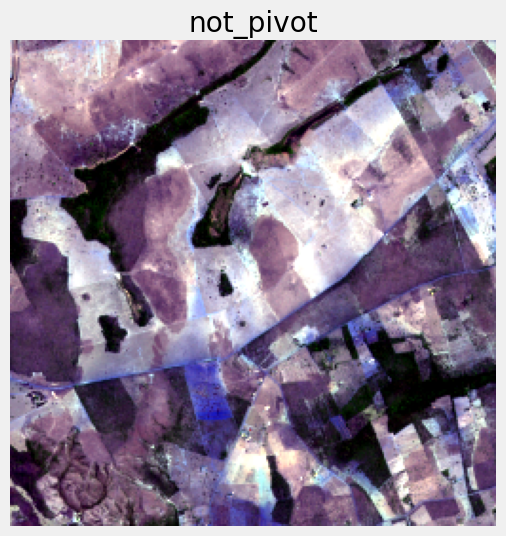

In [ ]:
i=2400
plt.figure(figsize=[6,6])
plt.title(class_list[Y[i]])
plt.imshow(X[i,:,:,:])
plt.axis('off')

Vamos dividir os dados em treinamento e teste:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

Depois de criar uma CNN customizada, vamos ver e analisar as principais arquiteturas utilizadas desde 2012:

### AlexNet

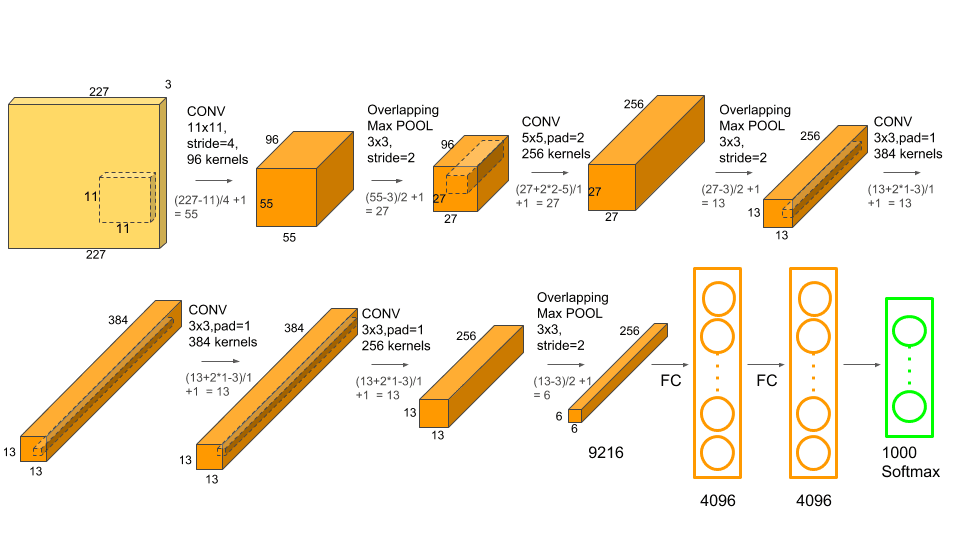

AlexNet é o nome de uma rede neural convolucional que teve um grande impacto no campo do aprendizado de máquina, especificamente na aplicação de aprendizado profundo à visão de máquina. Ele ganhou a famosa competição ImageNet LSVRC-2012 de 2012 por uma grande margem (15,3% VS 26,2% (segundo lugar) taxas de erro). A rede tinha uma arquitetura muito semelhante à LeNet de Yann LeCun et al, mas era mais profunda, com mais filtros por camada e com camadas convolucionais empilhadas. Consistia em 11 × 11, 5 × 5, 3 × 3, convolutions, max pooling, dropout, data augmentation, ReLU activations, SGD with momentum. Ele anexou ativações ReLU após cada camada convolucional e totalmente conectada. AlexNet foi treinado por 6 dias simultaneamente em duas GPUs Nvidia Geforce GTX 580, razão pela qual sua rede é dividida em dois pipelines.

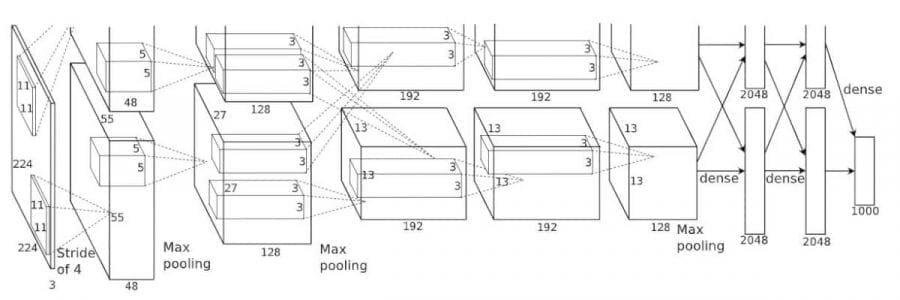

A arquitetura representada na figura acima, o AlexNet contém oito camadas com pesos; os cinco primeiros são convolucionais e os três restantes são totalmente conectados. A saída da última camada totalmente conectada é alimentada para um softmax de 1000 vias que produz uma distribuição sobre os 1000 rótulos de classe. A rede maximiza o objetivo da regressão logística multinomial, que é equivalente a maximizar a média entre os casos de treinamento da probabilidade logarítmica do rótulo correto sob a distribuição de previsão. Os kernels da segunda, quarta e quinta camadas convolucionais são conectados apenas aos mapas de kernel na camada anterior que residem na mesma GPU. Os kernels da terceira camada convolucional são conectados a todos os mapas de kernel na segunda camada. Os neurônios nas camadas totalmente conectadas são conectados a todos os neurônios na camada anterior.
Resumindo, o AlexNet contém 5 camadas convolucionais e 3 camadas totalmente conectadas. Relu é aplicado após uma camada muito convolucional e totalmente conectada. O abandono é aplicado antes do primeiro e do segundo ano totalmente conectado. A rede tem 62,3 milhões de parâmetros e precisa de 1,1 bilhão de unidades de computação em uma passagem direta. Também podemos ver as camadas de convolução, que representam 6% de todos os parâmetros, consomem 95% da computação.


Vamos agora aplicar a AlexNet ao nosso dataset:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, ZeroPadding2D
from keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
def alexnet_model(img_shape=(224, 224, 3),l2_reg=0.,weights=None):

	# Initialize model
	alexnet = Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(512, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 4
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 5
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 6
	alexnet.add(Flatten())
	alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 7
	alexnet.add(Dense(4096))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 8
	alexnet.add(Dense(1))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('sigmoid'))

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet

In [ ]:
input_shape = x_train.shape[1:]

In [ ]:
model = alexnet_model(img_shape=input_shape)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00001, decay=1e-6), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 96)      34944     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 96)     384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 96)     0         
 )                                                               
                                                                 


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 conv2d_1 (Conv2D)           (None, 128, 128, 256)     614656    
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 256)    1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128, 128, 256)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 256)      0         
 2D)                                                             
                                                                 
 zero_padding2d (ZeroPadding  (None, 66, 66, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 512)       1180160   
                                                                 
 batch_nor

In [ ]:
history = model.fit(x = x_train, y= y_train, batch_size=8, epochs=50, verbose=1, shuffle=True, validation_split= 0.2)

Epoch 1/50
176/176 [==============================] - 34s 106ms/step - loss: 0.5696 - accuracy: 0.7256 - val_loss: 0.9199 - val_accuracy: 0.2906
Epoch 2/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4743 - accuracy: 0.8346 - val_loss: 0.5215 - val_accuracy: 0.7578
Epoch 3/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4506 - accuracy: 0.8710 - val_loss: 0.4596 - val_accuracy: 0.8718
Epoch 4/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4446 - accuracy: 0.8895 - val_loss: 0.3986 - val_accuracy: 0.9259
Epoch 5/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4305 - accuracy: 0.9095 - val_loss: 0.5158 - val_accuracy: 0.7949
Epoch 6/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4274 - accuracy: 0.9216 - val_loss: 0.3813 - val_accuracy: 0.9259
Epoch 7/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4082 - accuracy: 0.9465 - val_loss: 0.3867 - val_accuracy

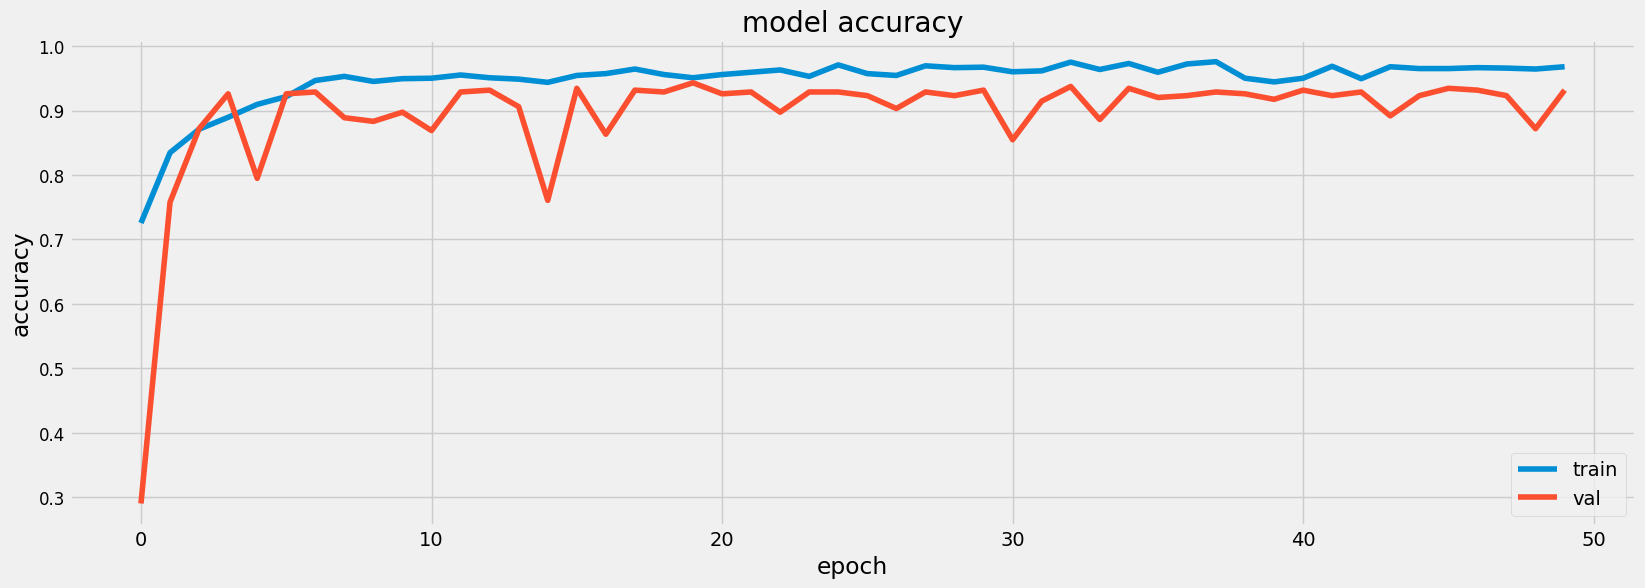

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

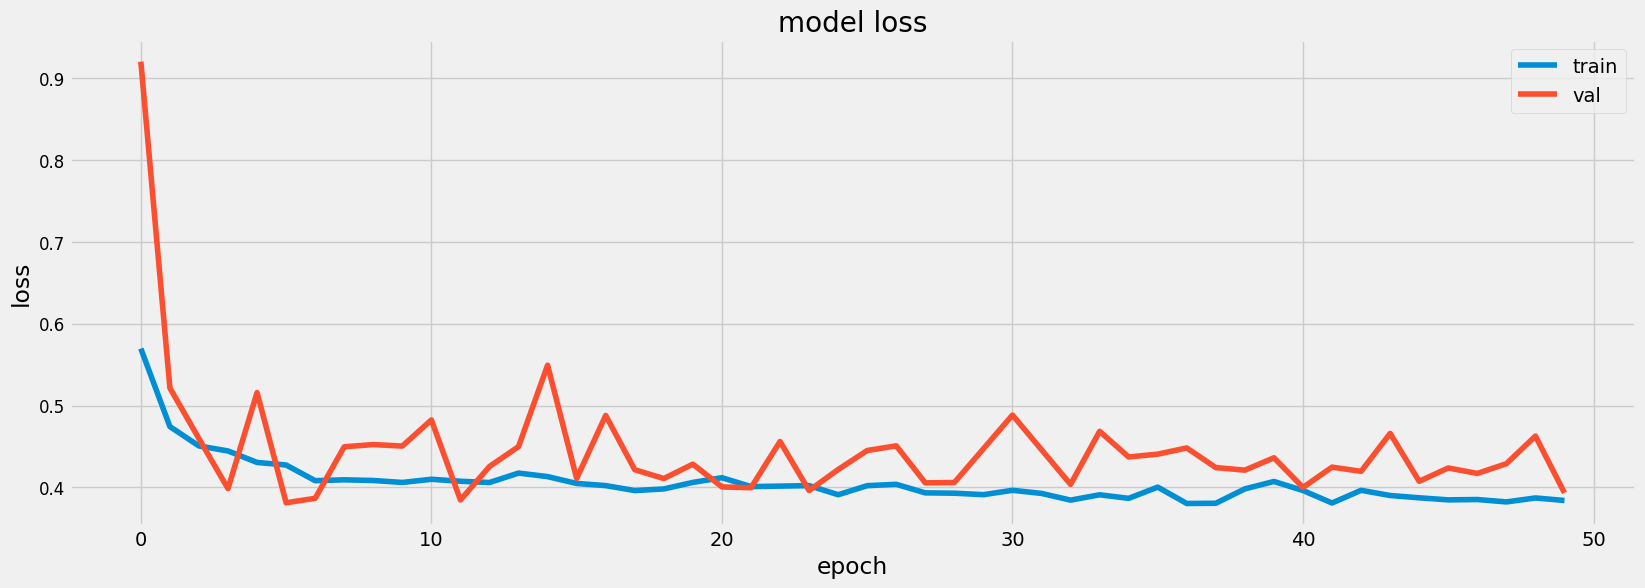

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### VGG

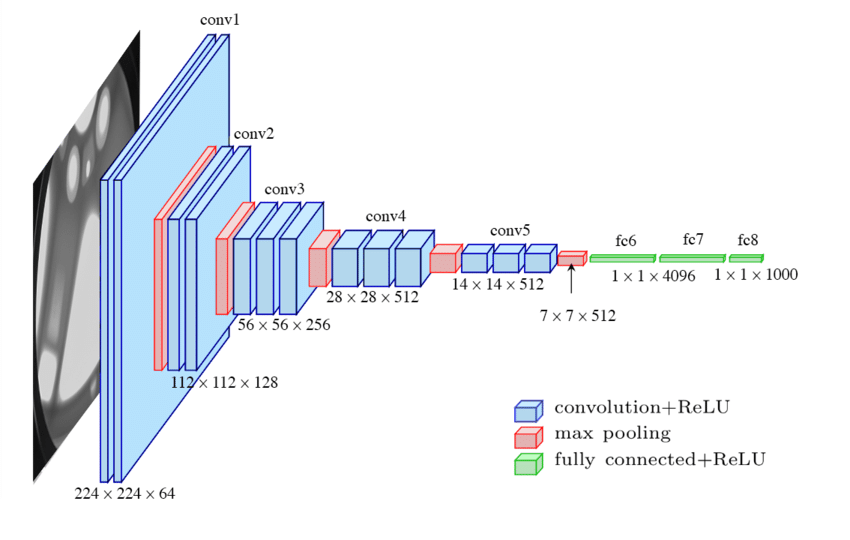

Redes Neurais VGG. Enquanto os derivados anteriores do AlexNet se concentravam em tamanhos de janela menores e avanços na primeira camada convolucional, o VGG aborda outro aspecto muito importante das CNNs: profundidade. Vamos examinar a arquitetura do VGG:
- Entrada. VGG leva em uma imagem RGB de 224x224 pixels. Para a competição ImageNet, os autores cortaram o patch central de 224x224 em cada imagem para manter o tamanho da imagem de entrada consistente.
- Camadas Convolucionais. As camadas convolucionais em VGG usam um campo receptivo muito pequeno (3x3, o menor tamanho possível que ainda captura esquerda/direita e cima/baixo). Existem também filtros de convolução 1x1 que atuam como uma transformação linear da entrada, que é seguida por uma unidade ReLU. O passo de convolução é fixado em 1 pixel para que a resolução espacial seja preservada após a convolução.
- Camadas totalmente conectadas. O VGG possui três camadas totalmente conectadas: as duas primeiras possuem 4096 canais cada e a terceira possui 1000 canais, 1 para cada classe.
- Camadas ocultas. Todas as camadas ocultas do VGG usam ReLU (uma grande inovação do AlexNet que reduz o tempo de treinamento). O VGG geralmente não usa a Normalização de Resposta Local (LRN), pois o LRN aumenta o consumo de memória e o tempo de treinamento sem nenhum aumento específico na precisão.

A diferença. O VGG, embora baseado no AlexNet, tem várias diferenças que o separam de outros modelos concorrentes:
- Em vez de usar grandes campos receptivos como AlexNet (11x11 com uma passada de 4), o VGG usa campos receptivos muito pequenos (3x3 com uma passada de 1). Como agora existem três unidades ReLU em vez de apenas uma, a função de decisão é mais discriminativa. Também há menos parâmetros (27 vezes o número de canais em vez de 49 vezes o número de canais do AlexNet).
- VGG incorpora camadas convolucionais 1x1 para tornar a função de decisão mais não linear sem alterar os campos receptivos.
- Os filtros de convolução de pequeno tamanho permitem que o VGG tenha um grande número de camadas de peso; é claro, mais camadas levam a um melhor desempenho. Este não é um recurso incomum, no entanto. O GoogLeNet, outro modelo que usa CNNs profundas e pequenos filtros de convolução, também foi apresentado na competição ImageNet de 2014.

In [ ]:
def vgg16_model(img_shape=(224, 224, 3), l2_reg=0.,
	weights=None):

	# Initialize model
	vgg16 = Sequential()

	# Layer 1 & 2
	vgg16.add(Conv2D(64, (3, 3), padding='same',
		input_shape=img_shape, kernel_regularizer=l2(l2_reg)))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(64, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3 & 4
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(128, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(128, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 5, 6, & 7
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(256, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(256, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(256, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(MaxPooling2D(pool_size=(2, 2)))

	# Layers 8, 9, & 10
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(MaxPooling2D(pool_size=(2, 2)))

	# Layers 11, 12, & 13
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(ZeroPadding2D((1, 1)))
	vgg16.add(Conv2D(512, (3, 3), padding='same'))
	vgg16.add(Activation('relu'))
	vgg16.add(MaxPooling2D(pool_size=(2, 2)))

	# Layers 14, 15, & 16
	vgg16.add(Flatten())
	vgg16.add(Dense(4096))
	vgg16.add(Activation('relu'))
	vgg16.add(Dropout(0.5))
	vgg16.add(Dense(4096))
	vgg16.add(Activation('relu'))
	vgg16.add(Dropout(0.5))
	vgg16.add(Dense(1))
	vgg16.add(Activation('sigmoid'))

	if weights is not None:
		vgg16.load_weights(weights)

	return vgg16

In [ ]:
input_shape = x_train.shape[1:]

In [ ]:
model = vgg16_model(img_shape=input_shape)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00001, decay=1e-6), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 activation_8 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 258, 258, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 258, 258, 64)      36928     
                                                                 
 activation_9 (Activation)   (None, 258, 258, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 129, 129, 64)     0         
 2D)                                                  

In [ ]:
history = model.fit(x = x_train, y= y_train, batch_size=8, epochs=50, verbose=1, shuffle=True, validation_split= 0.2)

Epoch 1/50
176/176 [==============================] - 14s 55ms/step - loss: 0.5809 - accuracy: 0.7106 - val_loss: 0.4511 - val_accuracy: 0.7635
Epoch 2/50
176/176 [==============================] - 7s 42ms/step - loss: 0.4532 - accuracy: 0.8076 - val_loss: 0.3882 - val_accuracy: 0.8490
Epoch 3/50
176/176 [==============================] - 8s 43ms/step - loss: 0.3886 - accuracy: 0.8475 - val_loss: 0.3537 - val_accuracy: 0.8832
Epoch 4/50
176/176 [==============================] - 7s 42ms/step - loss: 0.3229 - accuracy: 0.8632 - val_loss: 0.2384 - val_accuracy: 0.9231
Epoch 5/50
176/176 [==============================] - 7s 43ms/step - loss: 0.2869 - accuracy: 0.8817 - val_loss: 0.2499 - val_accuracy: 0.9003
Epoch 6/50
176/176 [==============================] - 7s 42ms/step - loss: 0.2838 - accuracy: 0.8959 - val_loss: 0.2047 - val_accuracy: 0.9174
Epoch 7/50
176/176 [==============================] - 7s 42ms/step - loss: 0.2323 - accuracy: 0.9009 - val_loss: 0.1862 - val_accuracy: 0.923

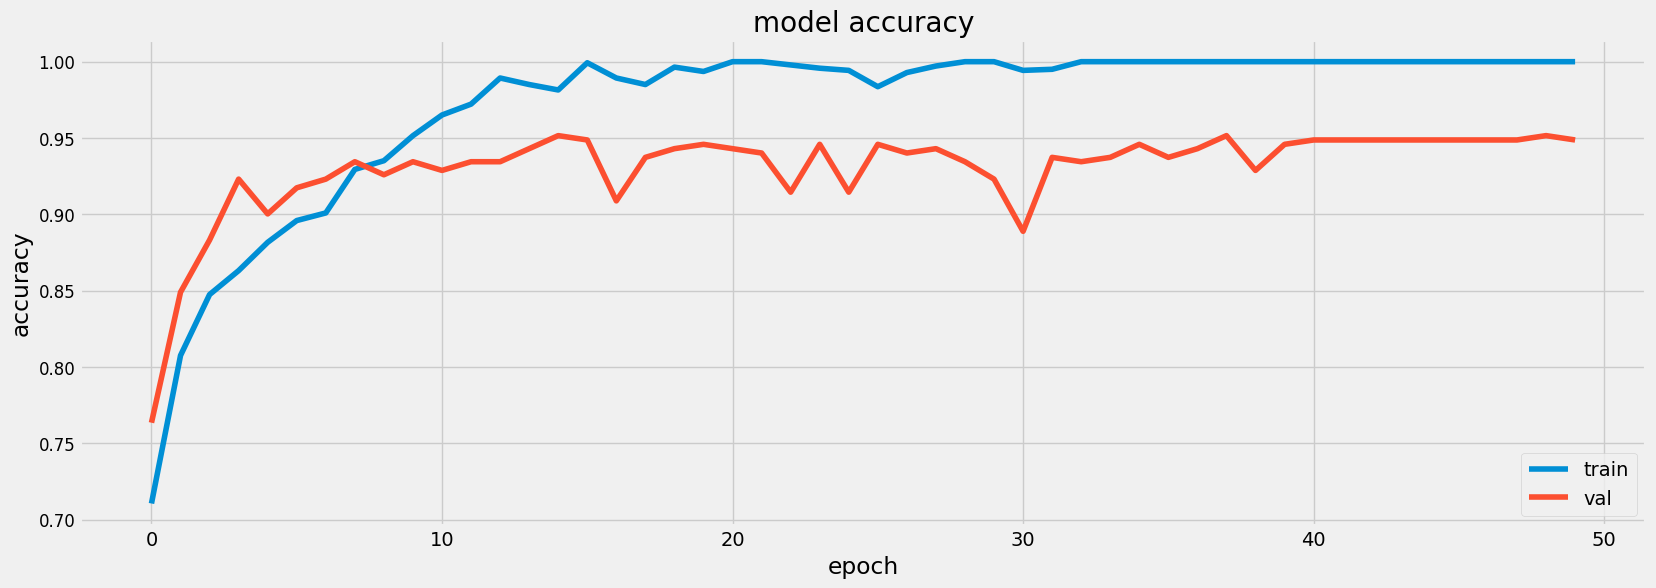

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

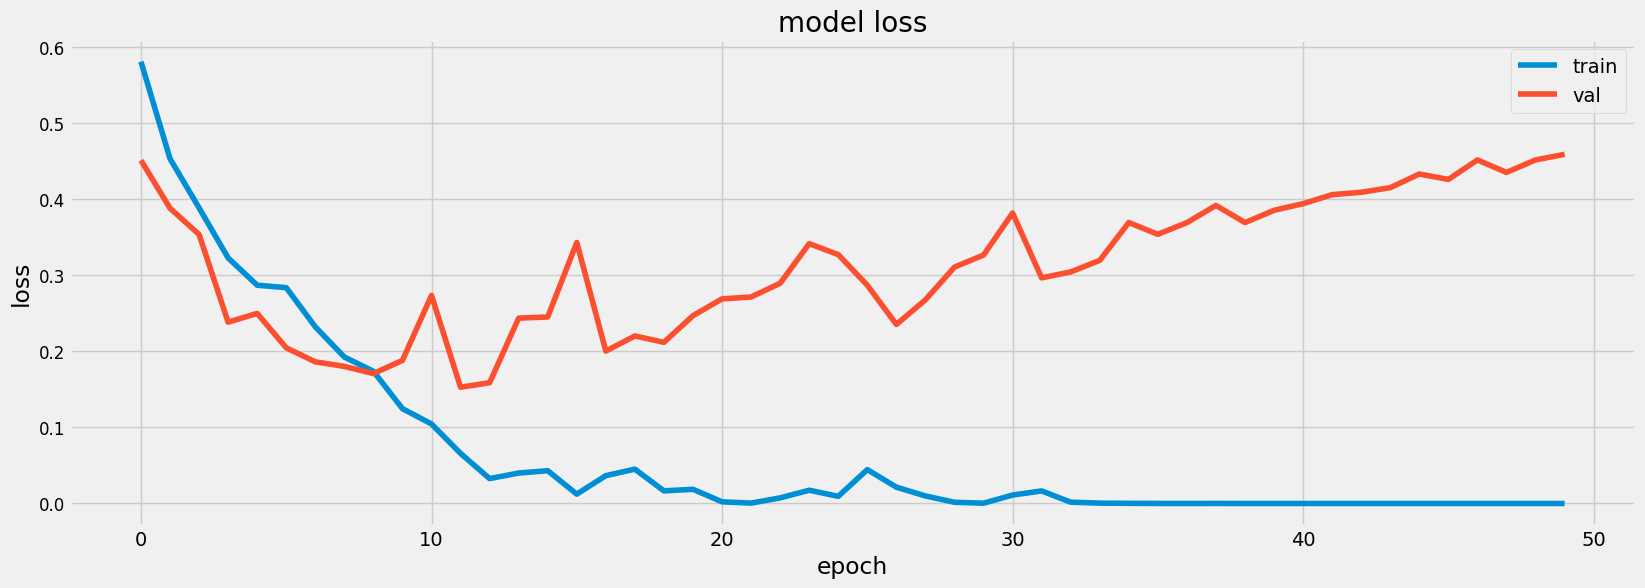

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## GoogLeNet and Inception Module

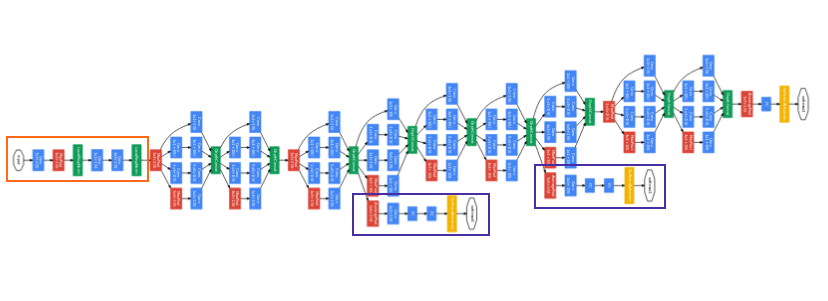

Existe uma maneira simples, mas poderosa, de criar melhores modelos de aprendizado profundo. Você pode apenas fazer um modelo maior, seja em termos de profundidade, ou seja, número de camadas, ou o número de neurônios em cada camada. Mas, como você pode imaginar, muitas vezes isso pode criar complicações:

Quanto maior o modelo, mais propenso é ao overfitting. Isso é particularmente perceptível quando os dados de treinamento são pequenos
Aumentar o número de parâmetros significa que você precisa aumentar seus recursos computacionais existentes
Uma solução para isso, como sugere o artigo, é passar para arquiteturas de rede esparsamente conectadas que substituirão arquiteturas de rede totalmente conectadas, especialmente dentro de camadas convolucionais. Essa ideia pode ser conceituada nas imagens abaixo:

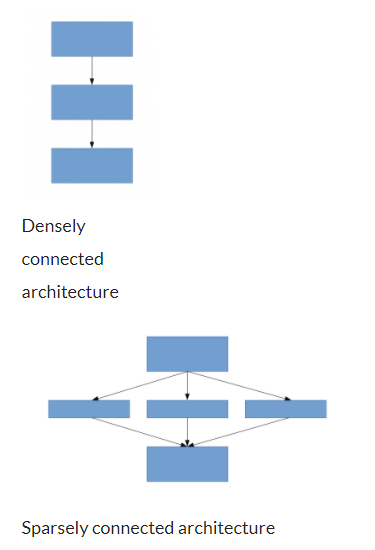

“(Inception Layer) é uma combinação de todas essas camadas (ou seja, 1 × 1 Convolutional layer, 3 × 3 Convolutional layer, 5 × 5 Convolutional layer) com seus bancos de filtro de saída concatenados em um único vetor de saída formando a entrada do próximo estágio."

- Juntamente com as camadas mencionadas acima, existem dois complementos principais na camada inicial original:

- Camada convolucional 1×1 antes de aplicar outra camada, que é usada principalmente para redução de dimensionalidade
Uma camada Max Pooling paralela, que fornece outra opção para a camada inicial

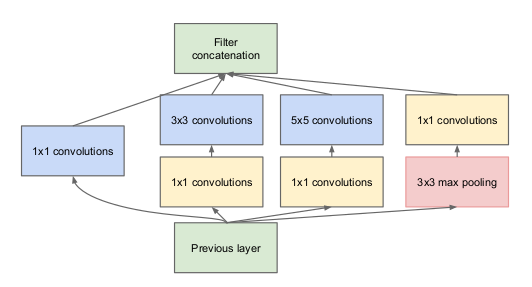

O GoogLeNet usa uma pilha de um total de 9 blocos iniciais e um agrupamento de média global para gerar suas estimativas. O agrupamento máximo entre os blocos de início reduz a dimensionalidade. O primeiro módulo é semelhante ao AlexNet e LeNet. A pilha de blocos é herdada do VGG e o agrupamento de média global evita uma pilha de camadas totalmente conectadas no final.

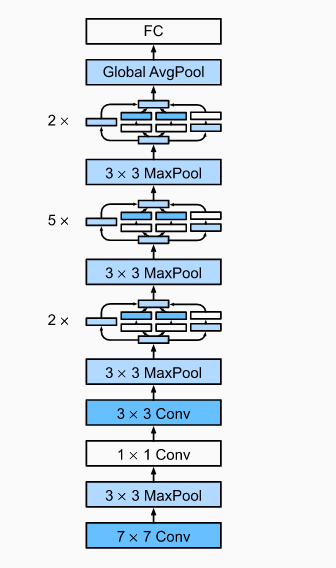

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, AveragePooling2D,Flatten
from keras import initializers
from keras.models import Sequential, Model

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

In [ ]:
kernel_init = initializers.glorot_uniform()
bias_init = initializers.Constant(value=0.2)
input_layer = Input(shape=input_shape)

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(1, activation='sigmoid', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(1, activation='sigmoid', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(1, activation='sigmoid', name='output')(x)

In [ ]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [ ]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 128, 128, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 64, 64, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00001, decay=1e-6), metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y= y_train, batch_size=8, epochs=50, verbose=1, shuffle=True, validation_split= 0.2)

Epoch 1/50
176/176 [==============================] - 14s 41ms/step - loss: 3.4052 - output_loss: 0.7055 - auxilliary_output_1_loss: 1.8135 - auxilliary_output_2_loss: 0.8862 - output_accuracy: 0.6657 - auxilliary_output_1_accuracy: 0.6393 - auxilliary_output_2_accuracy: 0.6664 - val_loss: 1.4277 - val_output_loss: 0.5034 - val_auxilliary_output_1_loss: 0.4304 - val_auxilliary_output_2_loss: 0.4939 - val_output_accuracy: 0.7493 - val_auxilliary_output_1_accuracy: 0.8091 - val_auxilliary_output_2_accuracy: 0.7493
Epoch 2/50
176/176 [==============================] - 4s 22ms/step - loss: 1.7831 - output_loss: 0.5574 - auxilliary_output_1_loss: 0.6990 - auxilliary_output_2_loss: 0.5267 - output_accuracy: 0.7384 - auxilliary_output_1_accuracy: 0.7227 - auxilliary_output_2_accuracy: 0.7577 - val_loss: 1.1345 - val_output_loss: 0.3972 - val_auxilliary_output_1_loss: 0.3508 - val_auxilliary_output_2_loss: 0.3864 - val_output_accuracy: 0.8575 - val_auxilliary_output_1_accuracy: 0.8632 - val_au

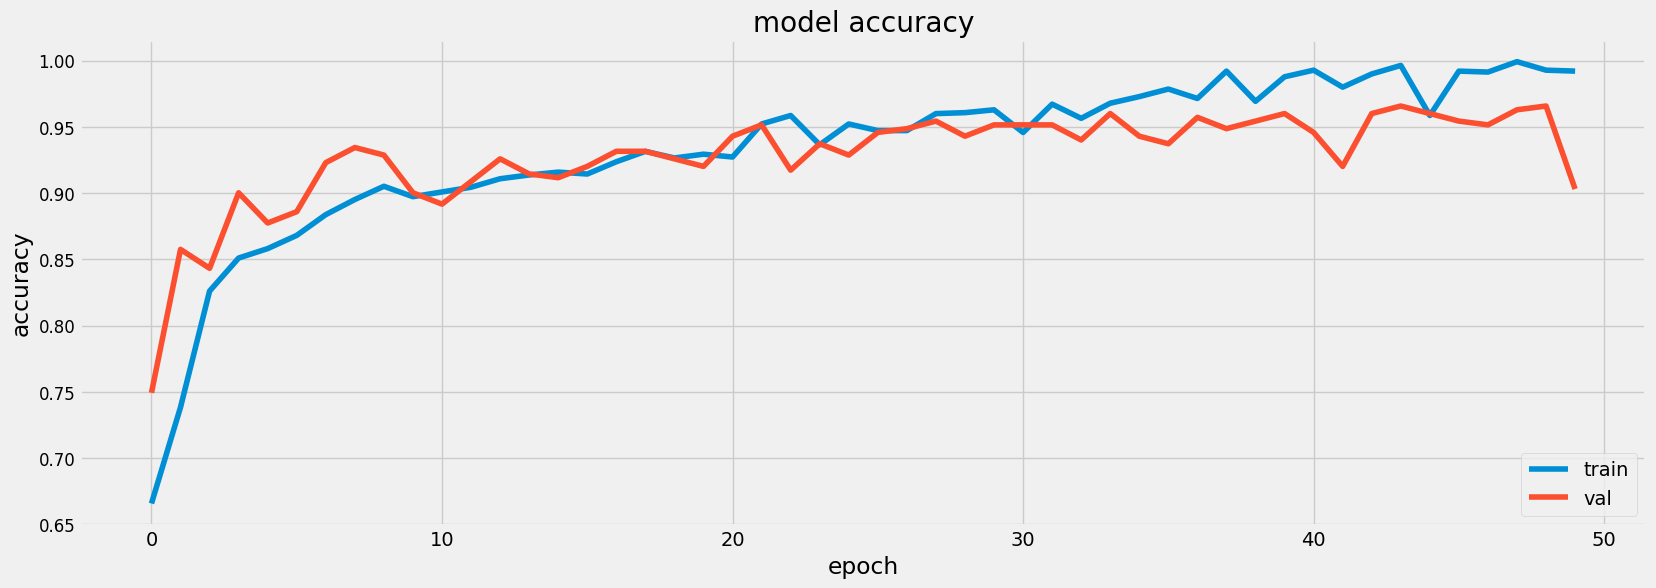

In [ ]:
plt.plot(history.history['output_accuracy'])
plt.plot(history.history['val_output_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

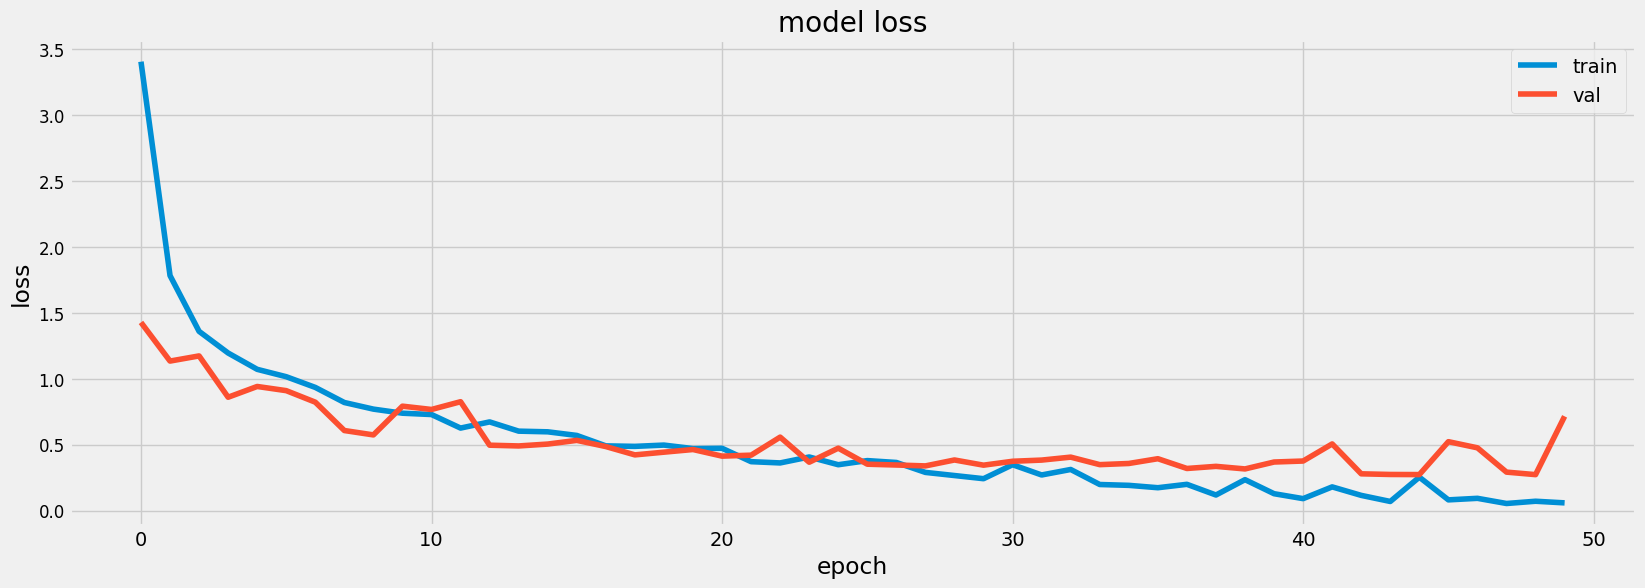

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()